In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [12]:
df = pd.read_csv('StudentsPerformance.csv')

# Quick glance of the data

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Statistical Summary

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Cleaning the names of columns

In [16]:
df.columns=df.columns.str.replace(".","_") #here we've replaced "." by "_" should use str before function to use string functions in pandas
df.columns=df.columns.str.replace("/","_") #here we've replaced "/" by "_" 
df.columns=df.columns.str.replace(" ","_") #here we replaced " " by "_" 

## Visual Representation of Data

<Axes: xlabel='gender', ylabel='count'>

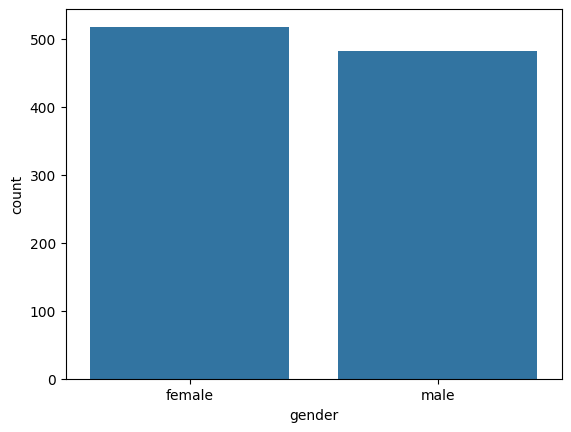

In [19]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='race_ethnicity', ylabel='count'>

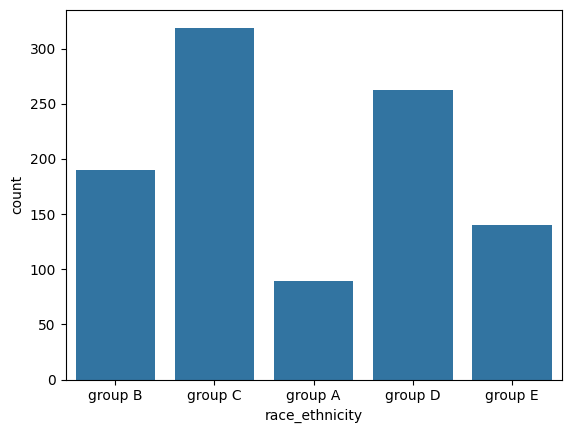

In [20]:
sns.countplot(x='race_ethnicity',data=df)

<Axes: xlabel='parental_level_of_education', ylabel='count'>

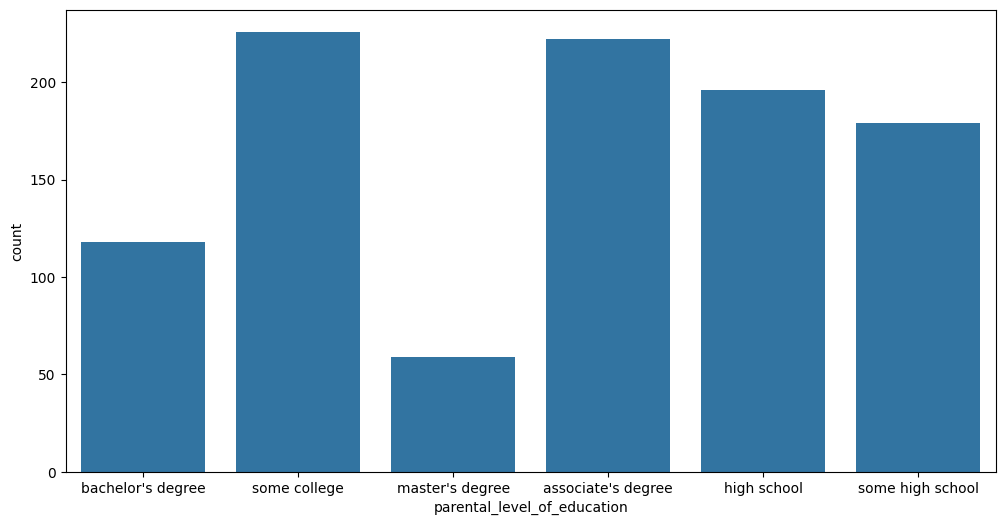

In [21]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='parental_level_of_education',data=df)

<Axes: xlabel='test_preparation_course', ylabel='count'>

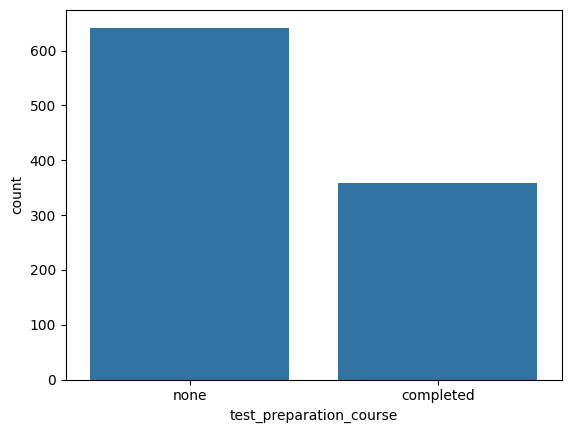

In [22]:
sns.countplot(x='test_preparation_course',data=df)

# Distribution of target variables

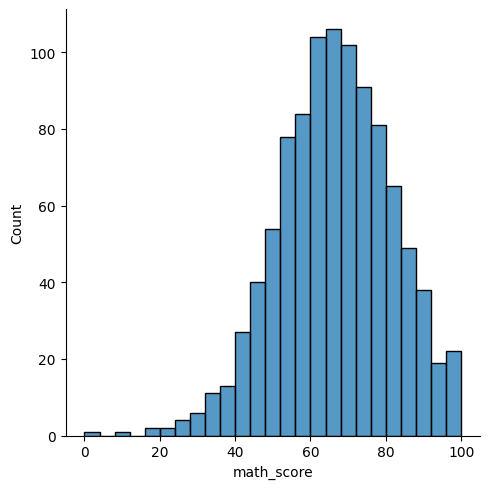

In [23]:
sns.displot(df['math_score'])

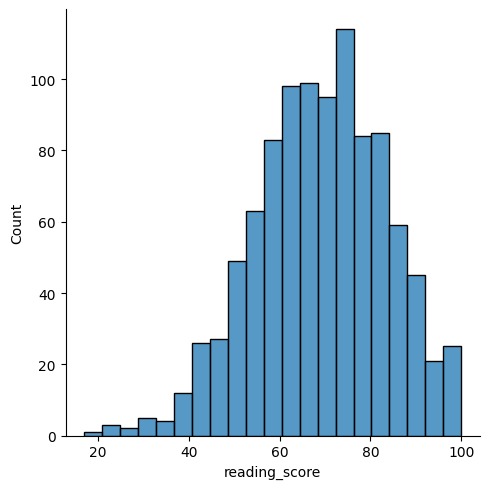

In [24]:
sns.displot(df['reading_score'])

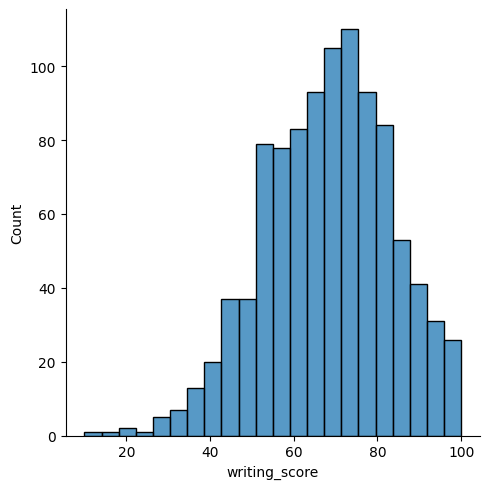

In [25]:
sns.displot(df['writing_score'])

# Relation of target variables

In [27]:
marks=df[['math_score','reading_score','writing_score']]

<Axes: >

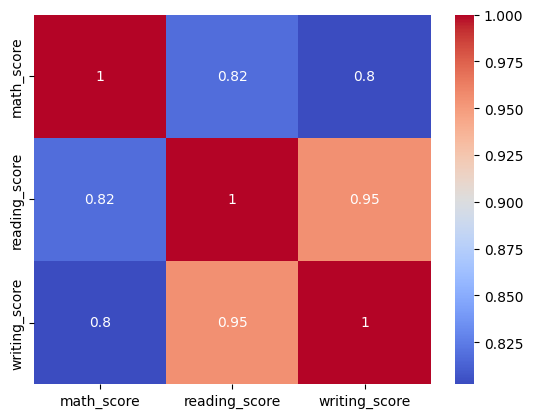

In [28]:
sns.heatmap(marks.corr(),annot=True,cmap='coolwarm')

# Student performing good on one subject is expected to score good in the remaining too subjects

<Axes: xlabel='math_score', ylabel='reading_score'>

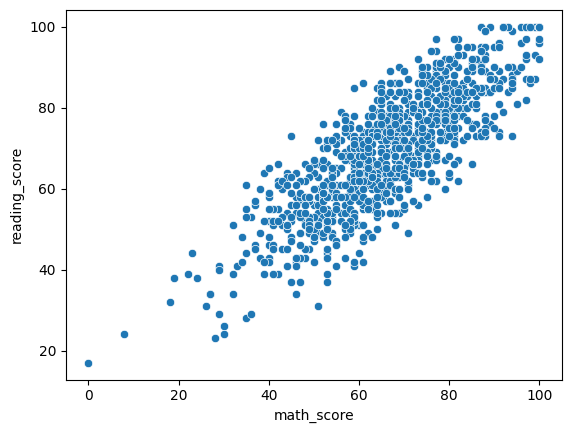

In [30]:
sns.scatterplot(x='math_score',y='reading_score',data=df)

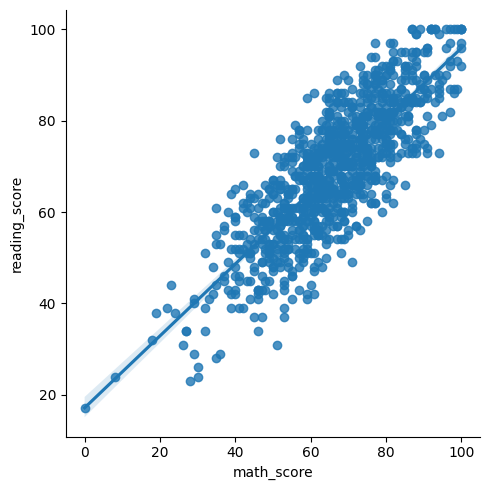

In [31]:
sns.lmplot(x='math_score',y='reading_score',data=df)

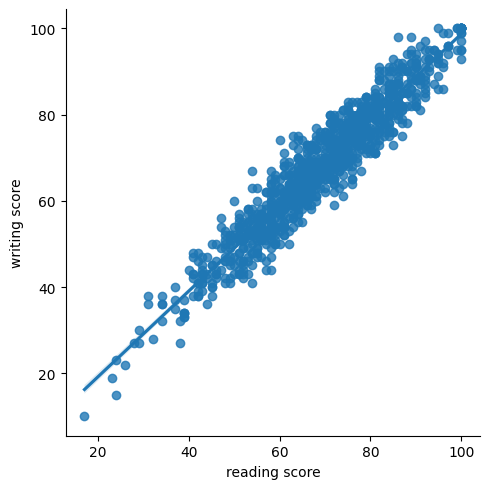

In [16]:
sns.lmplot(x='reading score',y='writing score',data=df)

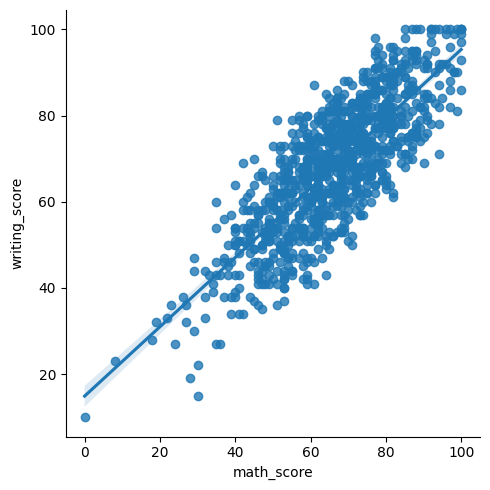

In [32]:
sns.lmplot(x='math_score',y='writing_score',data=df)

# Per column analysis to be continued

## Comparision of marks based on various factors

In [26]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.groupby('gender')[['math_score', 'reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Axes: xlabel='gender'>

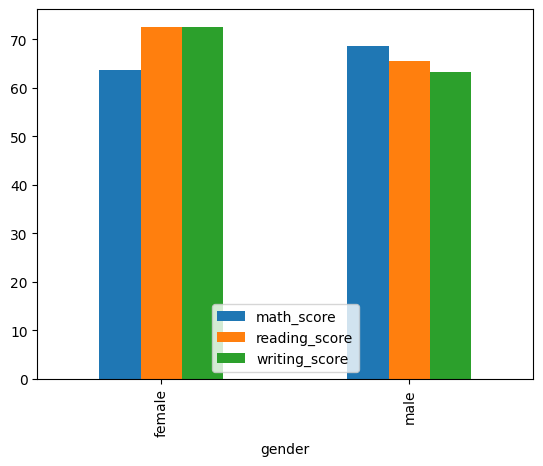

In [34]:
df.groupby(by='gender')[['math_score', 'reading_score','writing_score']].mean().plot.bar()

Female students tend to score more marks in reading and writing while male students score more in maths.

In [35]:
df.groupby(by='race_ethnicity')[['math_score','reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<Axes: xlabel='race_ethnicity'>

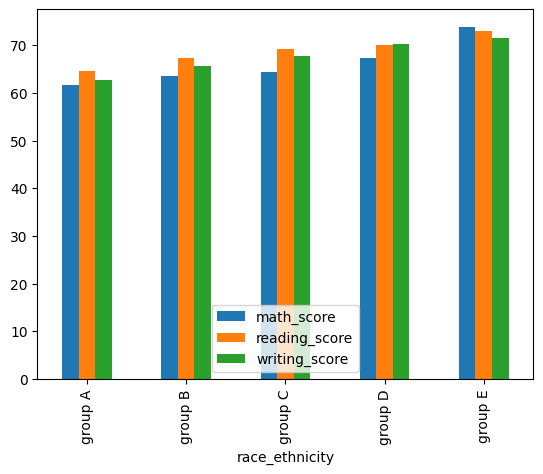

In [36]:
df.groupby(by=['race_ethnicity'])[['math_score', 'reading_score','writing_score']].mean().plot.bar()

Students of race/ethnicity of group E tend to score more marks in all subjects than students of other groups.

In [37]:
df.groupby(by='parental_level_of_education')[['math_score', 'reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<Axes: xlabel='parental_level_of_education'>

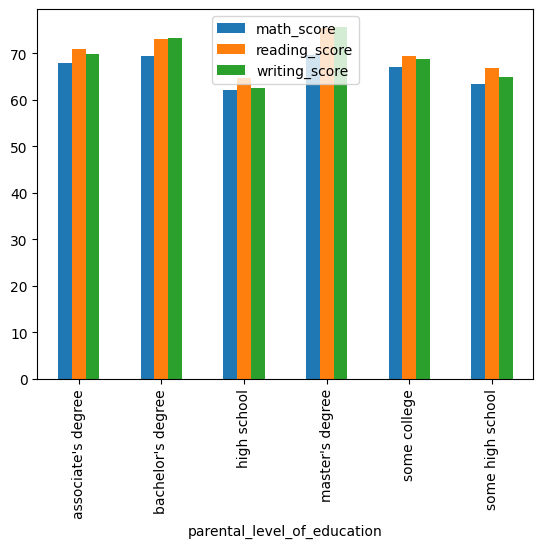

In [40]:
df.groupby(by='parental_level_of_education')[['math_score', 'reading_score','writing_score']].mean().plot.bar()

Students score tend to increase directly as per their parent's education. Parents having master's degree have a significant
impact on students to score more than those parents who only have a high school degree.

In [41]:
df.groupby(by='lunch')[['math_score', 'reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<Axes: xlabel='lunch'>

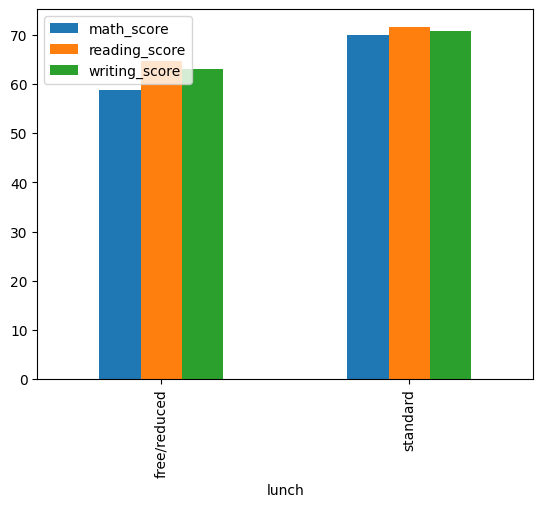

In [42]:
df.groupby(by=['lunch'])[['math_score', 'reading_score','writing_score']].mean().plot.bar()

Students scoring more who pay standard fee for their lunch can be reasoned by the fact that they might be capable of having better study environment due to their financial status. This relates directly with the parental level of education as higher educations usually leads to higher salary and financial stability.

In [43]:
df.groupby(by=['test_preparation_course'])[['math_score', 'reading_score','writing_score']].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<Axes: xlabel='test_preparation_course'>

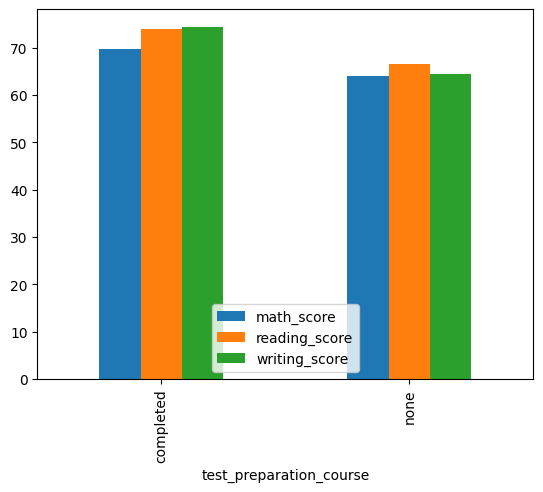

In [44]:
df.groupby(by=['test_preparation_course'])[['math_score', 'reading_score','writing_score']].mean().plot.bar()

As expected, students completing test preparation course score more than students who do not.

In [33]:
#End of Explorary Data Analysis

# Machine Learning using Random Forest

Importing libraries

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

### Preparing data for Machine Learning

In [46]:
import pandas as pd

In [47]:
df1 = pd.read_csv('StudentsPerformance.csv')

In [48]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [50]:
df1.columns=df1.columns.str.replace(".","_") #here we've replaced "." by "_" should use str before function to use string functions in pandas
df1.columns=df1.columns.str.replace("/","_") #here we've replaced "/" by "_" 
df1.columns=df1.columns.str.replace(" ","_") #here

In [51]:
df1['gender'].unique()

array(['female', 'male'], dtype=object)

In [52]:
cat_col=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']

In [53]:
le=LabelEncoder()

In [54]:
for col in cat_col:
    print(df1[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [55]:
for col in cat_col:
    df1[col]=le.fit_transform(df1[col])

In [56]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


## Separating and Splitting the data

In [57]:
X = df1.drop(['math_score','reading_score','writing_score'],axis=1)
y_maths = df1['math_score']
y_reading = df1['reading_score']
y_writing = df1['writing_score']

In [58]:
X_train, X_test, y_train_maths, y_test_maths = train_test_split(X, y_maths, test_size=0.33, random_state=42)
X_train, X_test, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.33, random_state=42)
X_train, X_test, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.33, random_state=42)

## Creating model

In [59]:
rfr_m = RandomForestRegressor(min_samples_leaf=20)
rfr_r = RandomForestRegressor(min_samples_leaf=20)
rfr_w = RandomForestRegressor(min_samples_leaf=20)

## Training the data For maths

In [77]:
rfr_m.fit(X_train,y_train_maths)
pred_maths = rfr_m.predict(X_test)
print(mean_absolute_error(y_test_maths,pred_maths))
print(r2_score(y_test_maths,pred_maths))

11.194961991673123
0.1882775297887409


## Prediction

In [61]:
rfr_m.predict([[0,1,1,1,1]])

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([64.57212106])

## For reading

In [75]:
rfr_r.fit(X_train,y_train_reading)
pred_reading = rfr_r.predict(X_test)
print(mean_absolute_error(y_test_reading,pred_reading))
print(r2_score(y_test_reading,pred_reading))

10.953973406169276
0.18956918232654962


In [69]:
rfr_r.predict([[0,1,1,1,1]])

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([71.59303232])

## For writing

In [76]:
rfr_w.fit(X_train,y_train_writing)
pred_writing = rfr_w.predict(X_test)
print(mean_absolute_error(y_test_writing,pred_writing))
print(r2_score(y_test_writing,pred_writing))

10.6834971083851
0.27590781651300633


In [71]:
rfr_w.predict([[0,1,1,1,1]])

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([70.54606683])

End of Machine Learning Section

# Deep Learning Model

In [62]:
from keras.layers import Dense
from keras.models import Sequential

### Model for maths Score

In [63]:
m_model=Sequential()

In [64]:
m_model.add(Dense(8, activation='relu', input_shape=(5,)))
# Another hidden layer
m_model.add(Dense(4, activation='relu'))
m_model.add(Dense(2, activation='relu'))
# Output layer (say, 1 unit for regression)
m_model.add(Dense(1, activation='linear'))

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
m_model.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [66]:
m_model.fit(X_train,y_train_maths,epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 69.1112 - mae: 69.1112 - val_loss: 68.3685 - val_mae: 68.3685
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.9196 - mae: 68.9196 - val_loss: 67.5339 - val_mae: 67.5339
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.4343 - mae: 68.4343 - val_loss: 66.7915 - val_mae: 66.7915
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.4712 - mae: 67.4712 - val_loss: 66.1605 - val_mae: 66.1605
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.5270 - mae: 67.5270 - val_loss: 65.6104 - val_mae: 65.6104
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.9293 - mae: 66.9293 - val_loss: 65.0911 - val_mae: 65.0911
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.7492 - mae: 65.7492 - val_loss: 64.5923 - val_mae: 64.5923
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.6067 - mae: 64.6067 - val_loss: 64.0994 - val_mae: 64.0994
Epoch 9/100
17/17 ━━━━━━━━━━━━━

In [67]:
m_model.evaluate(X_test,y_test_maths)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8669 - mae: 12.8669 


[12.555712699890137, 12.555712699890137]

In [68]:
m_model.predict(np.array([[0,1,1,1,1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[57.414448]], dtype=float32)

## Transformer Model

In [69]:
import torch
from tabpfn import TabPFNRegressor

In [70]:
model_maths = TabPFNRegressor(n_estimators=8, device='auto')
model_maths.fit(X_train,y_train_maths)
preds = model_maths.predict(X_test)
print("Predictions:", preds)

Predictions: [65.763954 61.02223  72.71404  60.219543 82.24881  60.716293 65.39142
 69.11106  58.95812  73.385635 55.234547 77.31894  56.97484  56.98391
 76.810684 72.20091  68.921844 63.124504 67.1805   54.896767 70.7081
 62.934696 61.528152 50.616993 65.6224   71.217354 77.70085  65.763954
 57.415035 56.98391  68.75859  76.810684 60.82146  77.35133  77.35133
 54.312218 60.716293 68.16841  66.55901  52.549904 74.70625  73.385635
 77.70085  65.03114  60.716293 75.99351  57.7119   63.604824 75.906395
 67.31663  74.860664 67.71681  75.662094 61.02223  65.35637  68.16841
 72.71404  69.687004 68.54732  69.185074 73.26688  58.640892 65.763954
 54.312218 67.10071  62.934696 56.98391  56.147064 62.92138  67.71681
 81.94233  68.05034  60.219543 52.86694  74.25236  81.52223  73.696594
 58.134228 63.528183 69.30222  61.8839   60.19541  71.44102  66.48498
 70.568375 50.616993 73.696594 69.11106  70.00768  59.178707 59.567722
 73.5757   72.71404  54.986145 65.338684 71.217354 71.4943   65.03114
 6

In [71]:
model_maths.predict(np.array([[0,1,1,1,1]]))

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but TabPFNRegressor was fitted with feature names
  warnings.warn(


array([66.969284], dtype=float32)

In [73]:
mae_trans=mean_absolute_error(y_test_maths,preds)

In [74]:
mae_trans

np.float64(11.152840481382428)